In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
coffee_df = pd.read_csv("df_arabica_clean.csv")
coffee_df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [3]:
coffee_df.dtypes

Unnamed: 0                 int64
ID                         int64
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Status                    object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Overall                  float64
Defects   

In [4]:
coffee_df.isnull().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

In [5]:
len(coffee_df)

207

In [6]:
len(coffee_df["Total Cup Points"].unique())

81

In [7]:
coffee_df["Total Cup Points"].min()

78.0

In [8]:
coffee_df["Total Cup Points"].max()

89.33

In [9]:
coffee_df["Total Cup Points"].round().value_counts()

84.0    49
85.0    39
83.0    39
82.0    34
86.0    20
80.0     9
87.0     7
81.0     6
78.0     2
89.0     1
88.0     1
Name: Total Cup Points, dtype: int64

In [10]:
prep_coffee_df = coffee_df[["Total Cup Points","Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean Cup", "Sweetness"]]
prep_coffee_df.head()

,Total Cup Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness
0,89.33,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0
1,87.58,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0
2,87.42,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0
3,87.17,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0
4,87.08,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0


In [11]:
prep_coffee_df["Total Cup Points"] = prep_coffee_df["Total Cup Points"].round()
prep_coffee_df["Total Cup Points"].value_counts()

C:\Users\cabon\AppData\Local\Temp\ipykernel_10676\4068907721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_coffee_df["Total Cup Points"] = prep_coffee_df["Total Cup Points"].round()


84.0    49
85.0    39
83.0    39
82.0    34
86.0    20
80.0     9
87.0     7
81.0     6
78.0     2
89.0     1
88.0     1
Name: Total Cup Points, dtype: int64

C:\Users\cabon\AppData\Local\Temp\ipykernel_10676\736290862.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


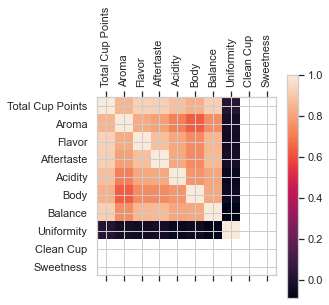

In [12]:
plt.matshow(prep_coffee_df.corr())
plt.xticks(np.arange(10), prep_coffee_df.columns, rotation=90)
plt.yticks(np.arange(10), prep_coffee_df.columns, rotation=0)
plt.colorbar()
plt.show()

In [13]:
prep_coffee_df["Clean Cup"]

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
202    10.0
203    10.0
204    10.0
205    10.0
206    10.0
Name: Clean Cup, Length: 207, dtype: float64

<AxesSubplot:>

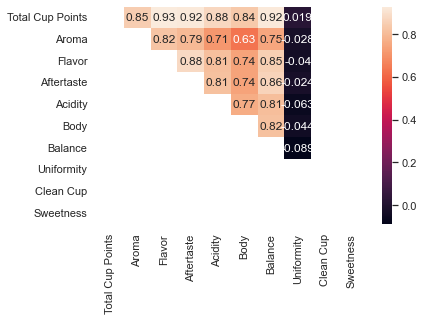

In [14]:
matrix = np.tril(prep_coffee_df.corr())
sns.heatmap(prep_coffee_df.corr(), annot=True, mask=matrix)

In [15]:
len(prep_coffee_df["Clean Cup"].unique())

1

In [16]:
len(prep_coffee_df["Sweetness"].unique())

1

In [17]:
prep_coffee_df.dtypes

Total Cup Points    float64
Aroma               float64
Flavor              float64
Aftertaste          float64
Acidity             float64
Body                float64
Balance             float64
Uniformity          float64
Clean Cup           float64
Sweetness           float64
dtype: object

In [34]:
y = prep_coffee_df["Total Cup Points"]
X = prep_coffee_df.drop("Total Cup Points", axis=1)
X.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness
29,8.00,7.92,8.00,7.83,7.67,8.00,10.0,10.0,10.0
19,8.17,8.00,7.92,7.92,8.17,7.75,10.0,10.0,10.0
55,7.67,7.92,7.92,7.83,7.75,7.83,10.0,10.0,10.0
93,7.67,7.92,7.58,7.75,7.67,7.58,10.0,10.0,10.0
180,7.33,7.42,7.33,7.42,7.58,7.42,10.0,10.0,10.0


In [36]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
classifier_newton_cg = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=50)
classifier_newton_cg.fit(X_train_scaled , y_train)
print(f"Training Model Score: {classifier_newton_cg.score(X_train_scaled, y_train)}")
print(f"Testing Model Score: {classifier_newton_cg.score(X_test_scaled, y_test)}")

Training Model Score: 0.8193548387096774
Testing Model Score: 0.7115384615384616


In [38]:
classifier_lbfgs = LogisticRegression(solver='lbfgs', max_iter=100)
classifier_lbfgs.fit(X_train_scaled, y_train)
print(f"Training Model Score: {classifier_lbfgs.score(X_train_scaled, y_train)}")
print(f"Testing Model Score: {classifier_lbfgs.score(X_test_scaled, y_test)}")

Training Model Score: 0.8193548387096774
Testing Model Score: 0.7115384615384616


In [39]:
y_pred = classifier_lbfgs.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[ 0  1  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  8  1  0  0  0]
 [ 0  0  0  2  6  2  0  0]
 [ 0  0  0  0  1 11  2  0]
 [ 0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  3  3]]


In [40]:
#!pip install deepchecks

In [43]:
from deepchecks import Dataset
from deepchecks.tabular.suites import model_evaluation
#suite = model_evaluation()
#suite_result = suite.run(train_dataset=X, test_dataset=y, model=model)
#vsuite = train_test_validation()

In [44]:
#from deepchecks import Dataset
#from deepchecks.tabular.suites import full_suite
ds_train = X_train.merge(y_train, left_index=True, right_index=True)
ds_test = X_test.merge(y_test, left_index=True, right_index=True)
ds_train = Dataset(ds_train, label="Total Cup Points")
ds_test =  Dataset(ds_test,  label="Total Cup Points")
suite = model_evaluation()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=classifier_lbfgs)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 3 categorical features were inferred.: Uniformity, Clean Cup, Sweetness
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 3 categorical features were inferred.: Uniformity, Clean Cup, Sweetness


C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\cabon\miniconda3\lib\site-packages\sklearn\base.p

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_53L0EO71A1EVHC5FH3IK962MC">Model Evaluation S…